###### `nvidia-smi` is a command-line tool for monitoring and managing NVIDIA GPUs. It provides details like GPU utilization, memory usage, temperature, fan speed, power consumption, driver version, and running processes. It's useful for optimizing GPU performance.

In [ ]:
!nvidia-smi

Tue Aug  6 13:09:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

###### This code installs various Python libraries for natural language processing, machine learning, and PDF handling, including PyTorch, Transformers, LangChain, ChromaDB, PyPDF, XFormers, Sentence Transformers, InstructorEmbedding, and PDF to Image conversion tools.

In [ ]:
#Installing the required libraries
!pip install -Uqqq pip --progress-bar off
!pip install -qqq torch==2.0.1 --progress-bar off
!pip install -qqq transformers==4.31.0 --progress-bar off
!pip install -qqq langchain==0.0.266 --progress-bar off
!pip install -qqq chromadb==0.4.5 --progress-bar off
!pip install -qqq pypdf==3.15.0 --progress-bar off
!pip install -qqq xformers==0.0.20 --progress-bar off
!pip install -qqq sentence_transformers==2.2.2 --progress-bar off
!pip install -qqq InstructorEmbedding==1.0.1 --progress-bar off
!pip install -qqq pdf2image==1.16.3 --progress-bar off

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.1+cu121 requires torch==2.3.1, but you have torch 2.0.1 which is incompatible.
torchtext 0.18.0 requires torch>=2.3.0, but you have torch 2.0.1 which is incompatible.
torchvision 0.18.1+cu121 requires torch==2.3.1, but you have torch 2.0.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.12 requires pydantic>=2.7.0, but you have pydantic 1.10.17 which is incompatible.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
 

#####This command downloads a specific version (0.4.1) of the AutoGPTQ library (a precompiled Python wheel file) from GitHub. The wget utility fetches the file silently (-q), targeting the CUDA 11.8 version and Python 3.10 on a 64-bit Linux system.

In [ ]:
#The AutoGPTQ library is a bit special (since we need to install the correct version with CUDA support). We can download and install it using the following commands:
!wget -q https://github.com/PanQiWei/AutoGPTQ/releases/download/v0.4.1/auto_gptq-0.4.1+cu118-cp310-cp310-linux_x86_64.whl

In [ ]:
!pip install -qqq auto_gptq-0.4.1+cu118-cp310-cp310-linux_x86_64.whl --progress-bar off

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
gcsfs 2024.6.1 requires fsspec==2024.6.1, but you have fsspec 2024.5.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
xformers 0.0.20 requires torch==2.0.1, but you have torch 2.3.1 which is incompatible.


####This command installs the poppler-utils package on a Linux system. poppler-utils provides a collection of tools for manipulating PDF files, such as converting PDFs to text or images.

In [ ]:
#We need to install the poppler-utils library to convert PDFs to images:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 2s (115 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 123598 

This code imports libraries for deep learning, language models, and PDF processing, and sets the device to GPU if available, otherwise CPU.

In [ ]:
#Let's import the required libraries:
import torch
from auto_gptq import AutoGPTQForCausalLM
from langchain import HuggingFacePipeline, PromptTemplate
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.embeddings import HuggingFaceInstructEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from pdf2image import convert_from_path
from transformers import AutoTokenizer, TextStreamer, pipeline

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
!rm -rf "db"


This code uses PyPDFDirectoryLoader to load all PDFs from a specified directory and returns a list of document objects, then prints the number of documents loaded.

In [ ]:
#We'll load the PDFs using the PyPDFDirectoryLoader class from the langchain library. This class loads all the PDFs in a directory and returns a list of Document objects
loader = PyPDFDirectoryLoader("pdfs")
docs = loader.load()
len(docs)

16

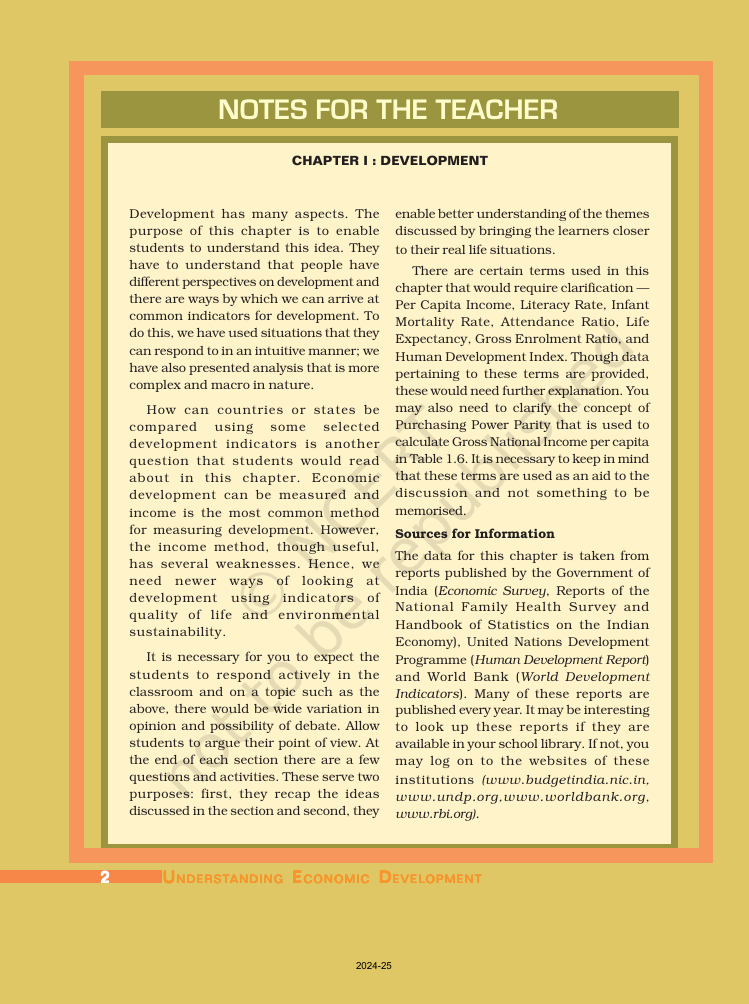

In [ ]:
economics_images = convert_from_path("/content/pdfs/economics.pdf", dpi=88)
economics_images[0]


#### This code sets up an instruction-finetuned text embedding model from "hkunlp/instructor-large" and uses it to create a vector store for text chunks.

In [ ]:
#We'll use instruction-finetuned text embedding model provided by "hkunlp/instructor-large".
#Using these chunks to create a vector store.
embeddings = HuggingFaceInstructEmbeddings(
    model_name="hkunlp/instructor-large", model_kwargs={"device": DEVICE}
)

.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

load INSTRUCTOR_Transformer
max_seq_length  512


##### This code uses RecursiveCharacterTextSplitter to divide the documents into smaller chunks of 1024 characters with a 64-character overlap and then prints the number of resulting text chunks.

In [ ]:
#We'll then use the RecursiveCharacterTextSplitter class to split the documents into smaller chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts = text_splitter.split_documents(docs)
len(texts)

45

This code creates a vector store using Chroma from the text chunks and embeddings, and saves it to the "db" directory. The operation's execution time is also measured.

In [ ]:
#Our vector store will use the Chroma database. We'll use the from_documents method to create it:
%%time
db = Chroma.from_documents(texts, embeddings, persist_directory="db")

CPU times: user 4.14 s, sys: 240 ms, total: 4.38 s
Wall time: 5.88 s


##### This code loads the Llama 2 13B GPTQ model and tokenizer using AutoGPTQ, specifying a 4-bit quantized model with 128 groups for accuracy. It sets up the model on the specified device with safety and configuration options.

In [ ]:
#Let's use AutoGPTQ to load the Llama 2 13B GPTQ model and the tokenizer:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GPTQ"
model_basename = "model"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

model = AutoGPTQForCausalLM.from_quantized(
    model_name_or_path,
    revision="gptq-4bit-128g-actorder_True",
    model_basename=model_basename,
    use_safetensors=True,
    trust_remote_code=True,
    inject_fused_attention=False,
    device=DEVICE,
    quantize_config=None,
)

#We're using a 4 bit quantized model with 128 groups.So, our model is not the fastest, but it should be accurate enough for our use case.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/837 [00:00<?, ?B/s]

1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.


config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

quantize_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/7.26G [00:00<?, ?B/s]

nvidia-smi is a command-line tool for monitoring and managing NVIDIA GPUs. It provides details like GPU utilization, memory usage, temperature, fan speed, power consumption, driver version, and running processes. It's useful for optimizing GPU performance

In [ ]:
!nvidia-smi

Tue Aug  6 13:21:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0              30W /  70W |   8557MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

This code defines a default system prompt for the Llama 2 model to ensure helpful, respectful, and accurate responses. It also provides a function to generate a complete prompt by combining the system prompt with a user query.

In [ ]:
#Note that Llama 2 supports a system prompt and a user prompt. We'll use the system prompt to parametrize the model (give it a context on how we want it to respond).
DEFAULT_SYSTEM_PROMPT = """
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe. Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
""".strip()


def generate_prompt(prompt: str, system_prompt: str = DEFAULT_SYSTEM_PROMPT) -> str:
    return f"""
[INST] <<SYS>>
{system_prompt}
<</SYS>>

{prompt} [/INST]
""".strip()

In [ ]:
#Creating the pipeline:
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

This code sets up a text generation pipeline with the model and tokenizer, configured to stream responses, ensure repeatability with a temperature of 0, and reduce token repetition using a repetition penalty.

In [ ]:
#This pipeline will stream the response of the model to the standard output. We'll set the temperature to 0 to make our responses repeatable.
#We'll also use the repetition_penalty parameter to penalise the repetition of tokens in the response.
text_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=100,
    temperature=0,
    top_p=0.95,
    repetition_penalty=1.15,
    streamer=streamer,
)

    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.3.1+cu121)
    Python  3.10.11 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
The model 'LlamaGPTQForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'Marian

In [ ]:
#To make our pipeline compatible with LangChain, we'll wrap it in the HuggingFacePipeline class:
llm = HuggingFacePipeline(pipeline=text_pipeline, model_kwargs={"temperature": 0})

In [ ]:
import re


This code defines a set of greeting, farewell, gratitude, and help request patterns with corresponding responses for a chatbot.

In [ ]:
# Define the greeting patterns and their corresponding responses
greeting_responses = {
    # Greetings
    r"\bhello\b": "Hello!",
    r"\bhi\b": "Hi!",
    r"\bhey\b": "Hey!",
    r"\bhurray\b": "Hurray!",
    r"\balas\b": "Alas!",
    r"\bhow are you\b": "I'm an AI, so I don't have feelings, but thanks for asking! How can I help you?",
    r"\bwhat's up\b": "Not much, just here to help you! What do you need?",
    r"\bgreetings\b": "Greetings! How can I assist you today?",
    r"\bhowdy\b": "Howdy! How can I help you today?",
    r"\bhiya\b": "Hiya! How can I assist you?",
    r"\bgood morning\b": "Good morning!",
    r"\bgood afternoon\b": "Good afternoon!",
    r"\bgood evening\b": "Good evening!",
    r"\bwelcome\b": "Welcome! How can I assist you today?",
    r"\bhey there\b": "Hey there! How can I assist you?",
    r"\bhi there\b": "Hi there! How can I help you today?",
    r"\bhello there\b": "Hello there!",

    # Farewells
    r"\bbye\b": "Goodbye! Have a great day!",
    r"\bgoodbye\b": "Goodbye! Have a wonderful day!",
    r"\bsee you\b": "See you later! Have a great day!",
    r"\btake care\b": "Take care! See you next time!",
    r"\bcya\b": "Cya! Have a great day!",
    r"\blater\b": "Later! Have a great day!",

    # Gratitude
    r"\bthanks\b": "You're welcome!",
    r"\bthank you\b": "You're welcome!",
    r"\bthx\b": "You're welcome!",
    r"\bthank you very much\b": "You're very welcome!",
    r"\bmany thanks\b": "Happy to help!",

    # Help requests
    r"\bhelp\b": "Sure, how can I help you?",
    r"\bcan you help me\b": "Of course, how can I help you?",
    r"\bneed help\b": "I'm here to help! What do you need?",
    r"\bassistance\b": "Sure, what do you need assistance with?",
    r"\bplease help\b": "Of course, how can I help you?",
    r"\bi need help\b": "I'm here to help! What do you need?"
}



This function checks if a given question matches any greeting pattern and returns the corresponding response, or None if no match is found.

In [ ]:
#Function to check if the question is a greeting and return the appropriate response
def get_greeting_response(question):
    for pattern, response in greeting_responses.items():
        if re.search(pattern, question, re.IGNORECASE):
            return response
    return None


This code creates a prompt template for the model, using a system prompt to guide responses and formatting it to include context and a question.

In [ ]:
# Create a prompt template that will be used to parametrize the model:
SYSTEM_PROMPT = "Use the following pieces of context to answer the question at the end. If you don't find an answer in the context, then just make up an answer."

template = generate_prompt(
    """
{context}

Question: {question}
""",
    system_prompt=SYSTEM_PROMPT,
)

In [ ]:
prompt = PromptTemplate(template=template, input_variables=["context", "question"])


This code creates a RetrievalQA chain using the model pipeline, embeddings, and prompt template, configured to retrieve and return source documents along with answers.

In [ ]:
#We'll use the RetrievalQA class to create a chain using our pipeline, embeddings and prompt template:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

This function handles a query by splitting it into sentences, checking each sentence for greeting responses, and generating answers using a QA chain if no greeting is detected. It collects and returns responses for each sentence.

In [ ]:
# Function to handle the query
def handle_query(question):
    end_punctuation = '.!?'

    # Split the paragraph into sentences
    sentences = []
    current_sentence = ""

    for char in question:
        current_sentence += char
        if char in end_punctuation:
            sentences.append(current_sentence.strip())
            current_sentence = ""

    # Add the last sentence if there is any
    if current_sentence:
        sentences.append(current_sentence.strip())

    # Print each sentence
    for sentence in sentences:
        print(sentence)
        greeting_response = get_greeting_response(sentence)
        ans=[]
        if greeting_response:
          # Return the appropriate greeting response
          ans+=greeting_response
            # return greeting_response
        else:
          # Generate a response using the context
              result = qa_chain({"query": sentence})
              ans.append(result)
              print(ans)
              # print(result)
              # return result
    return ans


This function splits a prompt into individual questions, generates answers for each using greeting responses or a QA chain, and returns the list of answers.

In [ ]:
def split_and_answer(prompt):
    # Split the prompt into individual questions based on common question delimiters
    import re
    questions = re.split(r'(?<=\?)\s+', prompt)

    # Function to generate answers for each question
    def answer_question(question):
        # Here, you can implement the logic to generate an answer for each question
        # For simplicity, this example just echoes the question
        greeting_response = get_greeting_response(question)
        if greeting_response:
          # Return the appropriate greeting response
          print(greeting_response)
          return greeting_response[0]
        return qa_chain({"query": question})

    # Generate answers for each question
    answers = [answer_question(q) for q in questions if q.strip()]

    return answers


The code splits the question into separate queries and generates answers for each using the split_and_answer function

In [ ]:
question = "Hey I have a questions? What is Net Attendance Ratio?"
answer=split_and_answer(question)

['Hey!']
 Based on the given context, here's the answer to the question:

Net Attendance Ratio refers to the percentage of children in the 14-15 age group who attend school out of the total number of children in the same age group. In other words, it measures the proportion of children who actually attend school among those who are eligible to do so.


In [ ]:
question = "Bye?"
answer=split_and_answer(question)

Goodbye! Have a great day!


In [ ]:
question = "Hi I have a questions? Define Infant Mortality Rate (or IMR)?"
answer=split_and_answer(question)

['Hi!']
 Sure! Here's the answer based on the given context:

Infant Mortality Rate (IMR) refers to the number of children who pass away before reaching their first birthday out of every thousand live births. In other words, it represents the number of infant deaths per thousand live births. This rate provides an indicator of the overall health and well-being of newborn children and the quality of healthcare they receive.


In [ ]:
question = "Hey"
answer=split_and_answer(question)

Hey!


In [ ]:
question = "Thank you."
answer=split_and_answer(question)

You're welcome!
